<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Прямое-кодирование-и-масштабирование-признаков" data-toc-modified-id="Прямое-кодирование-и-масштабирование-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Прямое кодирование и масштабирование признаков</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Исследование-баланса-классов" data-toc-modified-id="Исследование-баланса-классов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Исследование баланса классов</a></span></li><li><span><a href="#Изучение-моделей-без-учёта-дисбаланса" data-toc-modified-id="Изучение-моделей-без-учёта-дисбаланса-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изучение моделей без учёта дисбаланса</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Нам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком.

Построим модель с предельно большим значением *F1*-меры. Нужно довести метрику до 0.59.

Дополнительно измерим *AUC-ROC*, сравним её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Описание данных

**Признаки**:
* *RowNumber* — индекс строки в данных
* *CustomerId* — уникальный идентификатор клиента
* *Surname* — фамилия
* *CreditScore* — кредитный рейтинг
* *Geography* — страна проживания
* *Gender* — пол
* *Age* — возраст
* *Tenure* — сколько лет человек является клиентом банка
* *Balance* — баланс на счёте
* *NumOfProducts* — количество продуктов банка, используемых клиентом
* *HasCrCard* — наличие кредитной карты
* *IsActiveMember* — активность клиента
* *EstimatedSalary* — предполагаемая зарплата

**Целевой признак**:
* Exited — факт ухода клиента

## Подготовка данных

### Загрузка и изучение данных

Для начала подгрузим необходимые нам библиотеки для расчётов:

In [371]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

Загружаем данные:

In [372]:
try:
    churn = pd.read_csv('Churn.csv')
except:
    churn = pd.read_csv('/datasets/Churn.csv')

In [373]:
churn.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.00,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1.00,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8.00,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1.00,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2.00,"125,510.82",1,1,1,"79,084.10",0


Посмотрим главную первичную информацию о датафрейме:

In [374]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Видим, что только в одном столбце присутствуют пропущенные значения, который говорит нам о количестве лет, в течение которых человек является клиентом нашего банка.

Посмотрим описательную характеристику по численным данным:

In [375]:
churn.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,"10,000.00","10,000.00","10,000.00","10,000.00","9,091.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00","10,000.00"
mean,"5,000.50","15,690,940.57",650.53,38.92,5.00,"76,485.89",1.53,0.71,0.52,"100,090.24",0.20
std,"2,886.90","71,936.19",96.65,10.49,2.89,"62,397.41",0.58,0.46,0.50,"57,510.49",0.40
min,1.00,"15,565,701.00",350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,"2,500.75","15,628,528.25",584.00,32.00,2.00,0.00,1.00,0.00,0.00,"51,002.11",0.00
50%,"5,000.50","15,690,738.00",652.00,37.00,5.00,"97,198.54",1.00,1.00,1.00,"100,193.91",0.00
75%,"7,500.25","15,753,233.75",718.00,44.00,7.00,"127,644.24",2.00,1.00,1.00,"149,388.25",0.00
max,"10,000.00","15,815,690.00",850.00,92.00,10.00,"250,898.09",4.00,1.00,1.00,"199,992.48",1.00


Построим гистограммы, чтобы оценить примерное распределение данных:

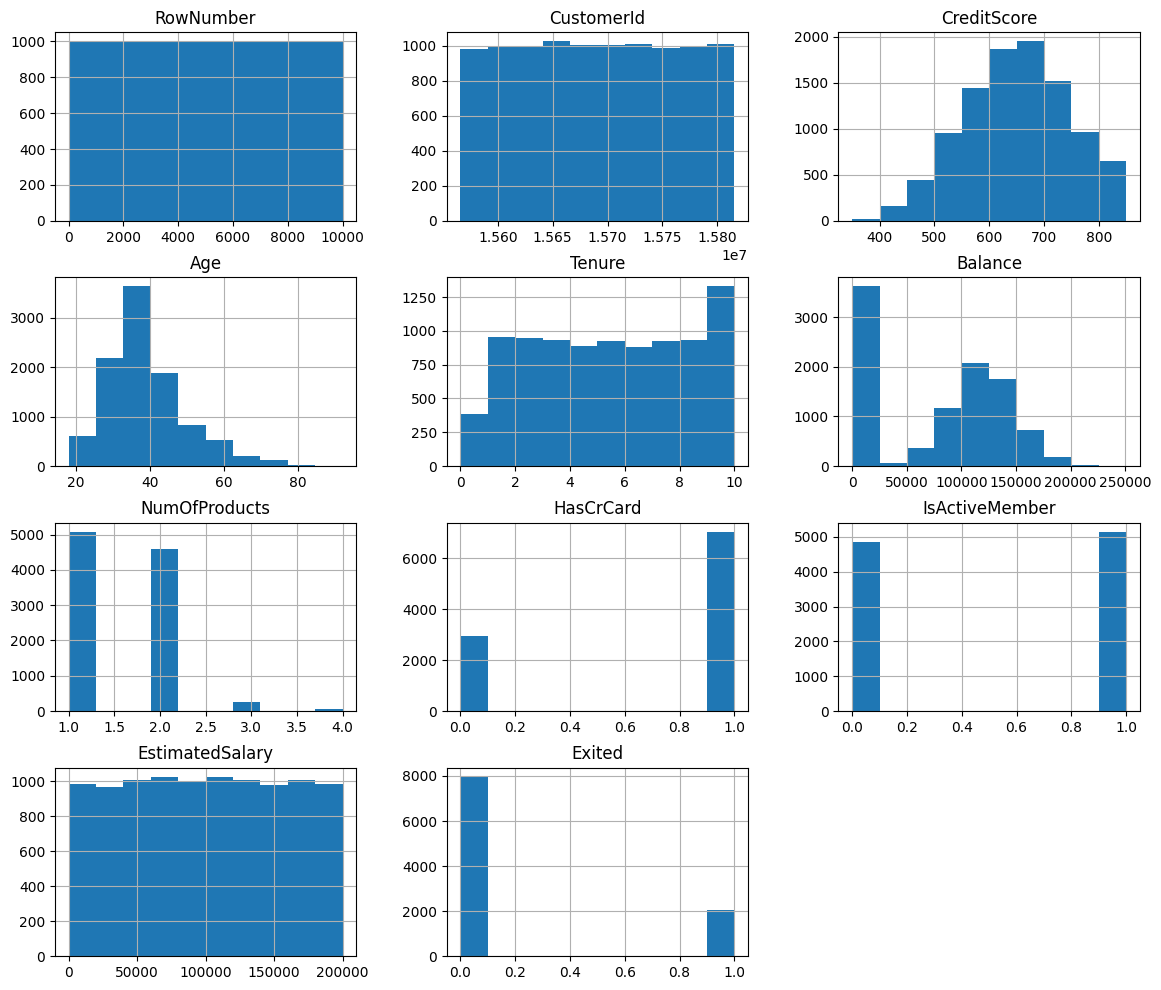

In [376]:
churn.hist(figsize=(14, 12))
plt.show()

По первичному анализу видим, что более частыми клиентами нашими банка становятся люди возрастом 30-40 лет. Баланс клиентов имеет вид нормального распределения, но более 3,5 тыс. клиентов имеют нулевой баланс. Около 70% клиентов пользуются кредитной картой нашего банка. Распределение по примерной заработной плате клиентом говорит нам о том, что среди клиентов примерно равное количество людей с различным уровнем заработка. Также около 20% от общего числа клиентов отказались от услуг нашего банка.

### Предобработка данных

Посмотрим на количество пропусков в данных:

In [377]:
churn.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

Видим, что действительно пропуски только в одном столбце. Заполним пропуски медианнымы значениями и проверим результат:

In [378]:
churn['Tenure'] = churn['Tenure'].fillna(churn['Tenure'].median())

In [379]:
churn.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Также проверим данные на наличие дубликатов:

In [380]:
churn.duplicated().sum()

0

Предобработка данных завершена успешно.

### Прямое кодирование и масштабирование признаков

Можем применить метод OHE к двум категориальным столбцам в нашем датафрейме - *Geography* и *Gender*. Посмотрим, какие уникальные значения в каждом из них, чтобы оценить целесообразность применения данного метода.

In [381]:
churn['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [382]:
churn['Gender'].unique()

array(['Female', 'Male'], dtype=object)

Можем с уверенностью воспользоваться прямым кодированием, чтобы преобразовать категориальные данные в количественные для упрощения обучения. Удалим первый столбец в каждом случае, чтобы не попасть в дамми-ловушку.

In [383]:
churn = pd.get_dummies(churn, drop_first=True, columns=['Geography', 'Gender'])
churn.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,1,15634602,Hargrave,619,42,2.00,0.00,1,1,1,"101,348.88",1,0,0,0
1,2,15647311,Hill,608,41,1.00,"83,807.86",1,0,1,"112,542.58",0,0,1,0
2,3,15619304,Onio,502,42,8.00,"159,660.80",3,1,0,"113,931.57",1,0,0,0
3,4,15701354,Boni,699,39,1.00,0.00,2,0,0,"93,826.63",0,0,0,0
4,5,15737888,Mitchell,850,43,2.00,"125,510.82",1,1,1,"79,084.10",0,0,1,0
5,6,15574012,Chu,645,44,8.00,"113,755.78",2,1,0,"149,756.71",1,0,1,1
6,7,15592531,Bartlett,822,50,7.00,0.00,2,1,1,"10,062.80",0,0,0,1
7,8,15656148,Obinna,376,29,4.00,"115,046.74",4,1,0,"119,346.88",1,1,0,0
8,9,15792365,He,501,44,4.00,"142,051.07",2,0,1,"74,940.50",0,0,0,1
9,10,15592389,H?,684,27,2.00,"134,603.88",1,1,1,"71,725.73",0,0,0,1


Теперь приступим к масштабированию данных с помощью стандартизации. Но перед этим поделим наши данные на обучающую, валидационную и тестовую выборки. Выделим целевой признак - *Exited* - и признаки, влияющие на определение классификации - удалим целевой признак, а также столбцы *RowNumber*, *CustomerId* и *Surname*, так как они не помогут в определении классификации, а могут создать лишь дополнительное препятствие в обучении для нашей будущей модели.

In [384]:
target = churn['Exited']
features = churn.drop(['Exited', 'RowNumber', 'CustomerId', 'Surname'], axis=1)

Далее делим данные на выборки в соотношении 60/20/20 на обучающую, валидационную и тестовую соответственною

In [385]:
features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                            test_size=0.2, random_state=123)

features_train, features_valid, target_train, target_valid = train_test_split(features_train, target_train,
                                                                              test_size=0.25, random_state=123)

Проверим размерность каждой из выборок:

In [386]:
print(target_train.shape, target_valid.shape, target_test.shape)

(6000,) (2000,) (2000,)


Деление прошло корректно. Далее в отдельную переменную вынесем признаки, к которым планируем применить масштабирование:

In [387]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']

Масштабируем признаки с помощью стандартизации:

In [388]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

Теперь выведем описательную характеристику к нужным столбцам во всех трёх выборках, чтобы проверить результаты преобразования. Перед этим применим команду для корректного и удобного отображения числовых данных.

In [389]:
pd.set_option('display.float_format', '{:,.2f}'.format)

In [390]:
features_train[numeric].describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,"6,000.00","6,000.00","6,000.00","6,000.00","6,000.00"
mean,-0.00,-0.00,0.00,0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00
min,-3.11,-1.98,-1.81,-1.21,-1.73
25%,-0.70,-0.66,-0.72,-1.21,-0.86
50%,0.01,-0.19,0.01,0.33,-0.02
75%,0.69,0.48,0.73,0.82,0.86
max,2.04,5.01,1.82,2.59,1.75


In [391]:
features_valid[numeric].describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,"2,000.00","2,000.00","2,000.00","2,000.00","2,000.00"
mean,-0.07,-0.04,0.01,0.03,0.03
std,0.98,0.98,1.01,1.00,1.00
min,-3.11,-1.98,-1.81,-1.21,-1.73
25%,-0.74,-0.66,-0.72,-1.21,-0.83
50%,-0.06,-0.19,0.01,0.36,0.05
75%,0.60,0.48,0.73,0.86,0.88
max,2.04,4.26,1.82,2.79,1.75


In [392]:
features_test[numeric].describe()

,CreditScore,Age,Tenure,Balance,EstimatedSalary
count,"2,000.00","2,000.00","2,000.00","2,000.00","2,000.00"
mean,0.01,0.01,0.01,0.01,0.02
std,1.00,0.97,1.01,0.98,0.99
min,-3.11,-1.98,-1.81,-1.21,-1.73
25%,-0.69,-0.66,-0.72,-1.21,-0.80
50%,0.02,-0.09,0.01,0.34,0.04
75%,0.69,0.48,0.73,0.81,0.86
max,2.04,4.07,1.82,2.34,1.74


Видим, что масштабирование дало нам желанный результат: среднее у всех данных в обучающей выборке равно 0, а стандартное отклонение - 1. В валидационной и тестовой эти характеристики близки к желаемым значениям.
Выведем первые строки обучающей выборки, чтобы увидеть получившиеся преобразованные данные.

In [393]:
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8189,0.65,-1.70,1.10,-1.21,2,1,0,-0.54,0,0,1
8845,0.80,0.00,-1.45,0.89,1,1,1,1.64,1,0,0
1165,0.62,0.95,0.01,1.26,2,0,0,1.68,1,0,0
1742,-0.70,1.42,-1.45,0.02,1,0,0,0.67,1,0,0
1139,0.78,1.70,-1.45,0.54,1,0,1,-1.72,0,1,0


## Исследование задачи

### Исследование баланса классов

В первую очередь посмотрим, существует ли в нашем целевом признаке дисбаланс классов. Для этого отсортируем значения столбца *Exited* в процентном соотношении и построим столбчатую диаграмму.

In [394]:
exited = churn['Exited'].value_counts(normalize=1)
exited

0   0.80
1   0.20
Name: Exited, dtype: float64

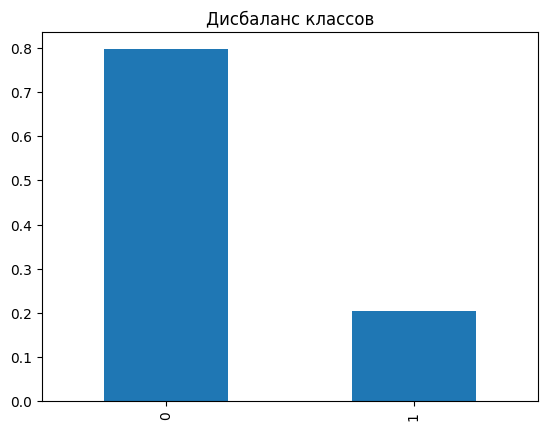

In [395]:
exited.plot(kind='bar')
plt.title('Дисбаланс классов')
plt.show()

Наблюдаем серьёзный дисбаланс классов: только 20% случаев результат положительный. Делаем вывод, что в данном случае методика accuracy нам не подойдёт, ведь константная модель, которая всегда будет предсказывать 0, будет иметь значение accuracy около 80%. Проверим на практике:

In [396]:
model_negative = pd.Series([0]*len(target))
accuracy_score(target, model_negative)

0.7963

Чтобы в дальнейшем проверить модель на адекватность будем пользоваться полнотой, точностью и метрикой F1, так как в данном случае они будет более объективными.

### Изучение моделей без учёта дисбаланса

Проверим значение метрик без учёта дисбаланса класса на трёх видах моделей: дерева решений, случайного леса и логистической регрессии. Для моделей решающего дерева и случайного леса подберём оптимальный гиперпараметры при помощи цикла и обучим лучшие модели. Далее для всех трёх моделей измерим ключевые метрики (полнота, точность и F1-метрика) и построим матрицу ошибок, а после сравним результаты.

####Дерево решений

In [397]:
best_f1 = 0

for depth in range(1, 16):
    model_tree = DecisionTreeClassifier(random_state=123, max_depth=depth)
    model_tree.fit(features_train, target_train)
    predictions_valid_tree = model_tree.predict(features_valid)
    f1_tree = f1_score(target_valid, predictions_valid_tree)
    if f1_tree > best_f1:
        best_tree = model_tree
        best_depth = depth
        best_f1 = f1_tree

print('Лучшее значение F1-метрики', best_f1, 'при глубине дерева', best_depth)

Лучшее значение F1-метрики 0.5677233429394812 при глубине дерева 5


In [398]:
predictions_valid_tree = best_tree.predict(features_valid)
probabilities_valid_tree = best_tree.predict_proba(features_valid)
probabilities_one_valid_tree = probabilities_valid_tree[:, 1]

print('Полнота дерева решений:', recall_score(target_valid, predictions_valid_tree))
print('Точность дерева решений:', precision_score(target_valid, predictions_valid_tree))
print('F1-метрика:', f1_score(target_valid, predictions_valid_tree))
print('ROC-AUC:', roc_auc_score(target_valid, probabilities_one_valid_tree))

Полнота дерева решений: 0.46904761904761905
Точность дерева решений: 0.718978102189781
F1-метрика: 0.5677233429394812
ROC-AUC: 0.8194529837251355


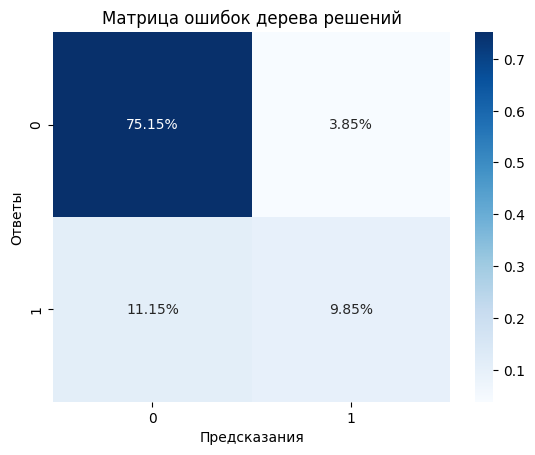

In [399]:
cf_matrix = confusion_matrix(target_valid, predictions_valid_tree)

matrix = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, cmap='Blues',  fmt='.2%')

matrix.set_title('Матрица ошибок дерева решений');
matrix.set_xlabel('Предсказания')
matrix.set_ylabel('Ответы');

plt.show()

####Случайный лес

In [400]:
best_f1 = 0

for depth in range(1, 16):
    for est in range(5, 51, 5):
        model_forest = RandomForestClassifier(random_state=123, max_depth=depth, n_estimators=est)
        model_forest.fit(features_train, target_train)
        predictions_valid_forest = model_forest.predict(features_valid)
        f1_forest = f1_score(target_valid, predictions_valid_forest)
        if f1_forest > best_f1:
            best_forest = model_forest
            best_depth = depth
            best_est = est
            best_f1 = f1_forest

print('Лучшее значение F1-метрики', best_f1, 'при глубине деревьев', best_depth, 'и численности леса', best_est)

Лучшее значение F1-метрики 0.5808383233532933 при глубине деревьев 15 и численности леса 20


In [401]:
predictions_valid_forest = best_forest.predict(features_valid)
probabilities_valid_forest = best_forest.predict_proba(features_valid)
probabilities_one_valid_forest = probabilities_valid_forest[:, 1]

print('Полнота случайного леса:', recall_score(target_valid, predictions_valid_forest))
print('Точность случайного леса:', precision_score(target_valid, predictions_valid_forest))
print('F1-метрика:', f1_score(target_valid, predictions_valid_forest))
print('ROC-AUC:', roc_auc_score(target_valid, probabilities_one_valid_forest))

Полнота случайного леса: 0.46190476190476193
Точность случайного леса: 0.782258064516129
F1-метрика: 0.5808383233532933
ROC-AUC: 0.8275557564798071


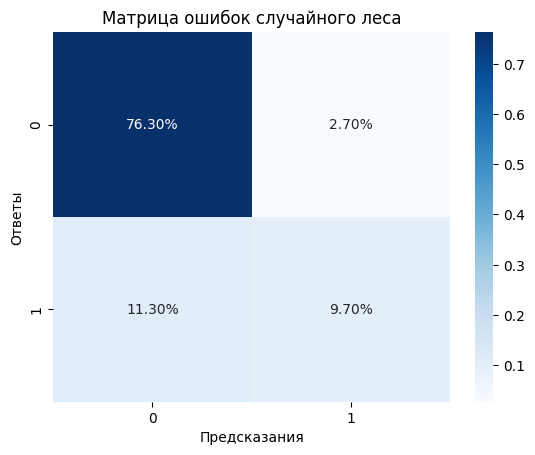

In [402]:
cf_matrix = confusion_matrix(target_valid, predictions_valid_forest)
matrix = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, cmap='Blues',  fmt='.2%')

matrix.set_title('Матрица ошибок случайного леса');
matrix.set_xlabel('Предсказания')
matrix.set_ylabel('Ответы');

plt.show()

####Логистическая регрессия

In [403]:
model_logistic = LogisticRegression(random_state=123, solver='liblinear')
model_logistic.fit(features_train, target_train)
predictions_valid_logistic = model_logistic.predict(features_valid)
probabilities_valid_logistic = model_logistic.predict_proba(features_valid)
probabilities_one_valid_logistic = probabilities_valid_logistic[:, 1]

print('Полнота логистической регрессии:', recall_score(target_valid, predictions_valid_logistic))
print('Точность логистической регрессии:', precision_score(target_valid, predictions_valid_logistic))
print('F1-метрика:', f1_score(target_valid, predictions_valid_logistic))
print('ROC-AUC:', roc_auc_score(target_valid, probabilities_one_valid_logistic))

Полнота логистической регрессии: 0.18095238095238095
Точность логистической регрессии: 0.6031746031746031
F1-метрика: 0.2783882783882784
ROC-AUC: 0.760703737191079


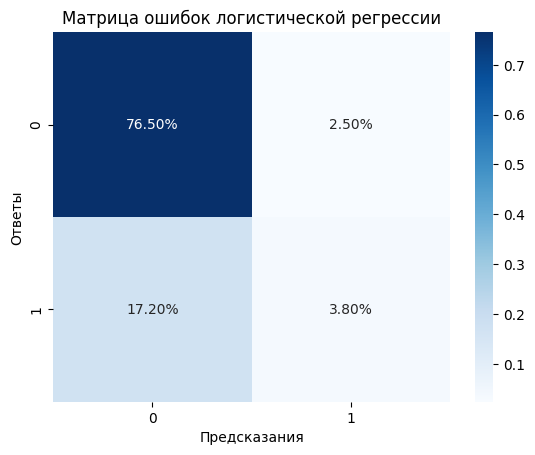

In [404]:
cf_matrix = confusion_matrix(target_valid, predictions_valid_logistic)
matrix = sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, cmap='Blues',  fmt='.2%')

matrix.set_title('Матрица ошибок логистической регрессии');
matrix.set_xlabel('Предсказания')
matrix.set_ylabel('Ответы');

plt.show()

####*Выводы*

Показания F1-метрики у модели:
* дерева решений - 0.568
* случайного леса - 0.581
* логистической регрессии - 0.278

По результатам видим, что хуже всего и с огромным отрывом справилась модель логистической регрессии. Модель случайного леса показала наилучшие результаты.

Смотря на матрицы ошибок, можно сказать, что показатели чуть лучше у модели дерева решений: самый низкий показатель ложнонегативных предсказаний (11.15%), чем у моделей случайного леса (11.30%) и логистической регрессии (17.20%), и также самый высокий показатель истинноположительных предсказаний (9.85%), чем у моделей случайного леса (9.70%) и логистической регрессии (3.80%). Но матрицы ошибок хорошо и наглядно отражают явный дисбаланс классов, что непосредственно влияет на предсказания.

К сожалению, данные показатели не дотягивают до заявленного приемлемого минимума метрики F1 - 0.59. Поэтому далее прибегнем к минимизации влияния дисбаланса классов.

## Борьба с дисбалансом

Мы будем использовать три метода борьбы с дисбалансом классов:
взвешивание классов, увеличение выборки и уменьшение выборки. После посмотрим, какой из методов будет наиболее действенный и на какой модели после преобразования будут наилучшие показатели.


### Взвешивание классов

Для использования этого метода добавим в параметры каждой из моделей аргумент *class_weight* со значением **"balanced"**. Таким образом у наименьшего положительного класса появится больший вес.

#### Дерево решений

In [405]:
best_f1 = 0

for depth in range(1, 16):
    model_tree = DecisionTreeClassifier(random_state=123, max_depth=depth, class_weight='balanced')
    model_tree.fit(features_train, target_train)
    predictions_valid_tree = model_tree.predict(features_valid)
    f1_tree = f1_score(target_valid, predictions_valid_tree)
    if f1_tree > best_f1:
        best_tree = model_tree
        best_depth = depth
        best_f1 = f1_tree

print('Лучшее значение F1-метрики', best_f1, 'при глубине дерева', best_depth)

Лучшее значение F1-метрики 0.5506072874493927 при глубине дерева 8


In [406]:
predictions_valid_tree = best_tree.predict(features_valid)
probabilities_valid_tree = best_tree.predict_proba(features_valid)
probabilities_one_valid_tree = probabilities_valid_tree[:, 1]

print('Полнота дерева решений:', recall_score(target_valid, predictions_valid_tree))
print('Точность дерева решений:', precision_score(target_valid, predictions_valid_tree))
print('F1-метрика:', f1_score(target_valid, predictions_valid_tree))
print('ROC-AUC:', roc_auc_score(target_valid, probabilities_one_valid_tree))

Полнота дерева решений: 0.6476190476190476
Точность дерева решений: 0.4788732394366197
F1-метрика: 0.5506072874493927
ROC-AUC: 0.7980417420132611


#### Случайный лес

In [407]:
best_f1 = 0

for depth in range(1, 16):
    for est in range(5, 51, 5):
        model_forest = RandomForestClassifier(random_state=123, max_depth=depth, n_estimators=est, class_weight='balanced')
        model_forest.fit(features_train, target_train)
        predictions_valid_forest = model_forest.predict(features_valid)
        f1_forest = f1_score(target_valid, predictions_valid_forest)
        if f1_forest > best_f1:
            best_forest = model_forest
            best_depth = depth
            best_est = est
            best_f1 = f1_forest

print('Лучшее значение F1-метрики', best_f1, 'при глубине деревьев', best_depth, 'и численности леса', best_est)

Лучшее значение F1-метрики 0.6121437422552665 при глубине деревьев 10 и численности леса 45


In [408]:
predictions_valid_forest = best_forest.predict(features_valid)
probabilities_valid_forest = best_forest.predict_proba(features_valid)
probabilities_one_valid_forest = probabilities_valid_forest[:, 1]

print('Полнота случайного леса:', recall_score(target_valid, predictions_valid_forest))
print('Точность случайного леса:', precision_score(target_valid, predictions_valid_forest))
print('F1-метрика:', f1_score(target_valid, predictions_valid_forest))
print('ROC-AUC:', roc_auc_score(target_valid, probabilities_one_valid_forest))

Полнота случайного леса: 0.5880952380952381
Точность случайного леса: 0.6382428940568475
F1-метрика: 0.6121437422552665
ROC-AUC: 0.8390611814345992


#### Логистическая регрессия

In [409]:
model_logistic = LogisticRegression(random_state=123, solver='liblinear', class_weight='balanced')
model_logistic.fit(features_train, target_train)
predictions_valid_logistic = model_logistic.predict(features_valid)
probabilities_valid_logistic = model_logistic.predict_proba(features_valid)
probabilities_one_valid_logistic = probabilities_valid_logistic[:, 1]

print('Полнота логистической регрессии:', recall_score(target_valid, predictions_valid_logistic))
print('Точность логистической регрессии:', precision_score(target_valid, predictions_valid_logistic))
print('F1-метрика:', f1_score(target_valid, predictions_valid_logistic))
print('ROC-AUC:', roc_auc_score(target_valid, probabilities_one_valid_logistic))

Полнота логистической регрессии: 0.6952380952380952
Точность логистической регрессии: 0.38675496688741723
F1-метрика: 0.4970212765957447
ROC-AUC: 0.7637025316455696


#### *Выводы*

Оценим изменения, которые произошли от изначельного значения метрики F1:

* дерево решений - 0.568 -> 0.55
* случайный лес - 0.581 -> 0.612
* логистическая регрессия - 0.278 -> 0.497

Сильнее всего улучшилось качество метрики модели линецной регрессии, но показатель по прежнему показывает минимальное значение. Наилучший показатель по прежнему у модели случайного леса. Модель дерева решений наоборот показала меньшее значение метрики F1, чем в первом случае.

### Увеличение выборки

Для того, чтобы преобразовать выборку и увеличить объекты наименьшего класса, напишем функцию, в которой аргументами будут являтся признаки, целевой признак и количество повторений выборки. Увеличивать выборку будем в 4 раза, так как изначально в наших данных отрицательный класс больше положительного в 4 раза (80/20).

In [410]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=123)
    return features_upsampled, target_upsampled

Применяем функцию к данным и проверяем размер получившейся выобрки.

In [411]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

print(features_upsampled.shape)
print(target_upsampled.shape)

(9609, 11)
(9609,)


Далее обучаем модели на наших получившихся данных и измеряем результаты.

#### Дерево решений

In [412]:
best_f1 = 0

for depth in range(1, 16):
    model_tree = DecisionTreeClassifier(random_state=123, max_depth=depth)
    model_tree.fit(features_upsampled, target_upsampled)
    predictions_valid_tree = model_tree.predict(features_valid)
    f1_tree = f1_score(target_valid, predictions_valid_tree)
    if f1_tree > best_f1:
        best_tree = model_tree
        best_depth = depth
        best_f1 = f1_tree

print('Лучшее значение F1-метрики', best_f1, 'при глубине дерева', best_depth)

Лучшее значение F1-метрики 0.5509586276488395 при глубине дерева 8


In [413]:
predictions_valid_tree = best_tree.predict(features_valid)
probabilities_valid_tree = best_tree.predict_proba(features_valid)
probabilities_one_valid_tree = probabilities_valid_tree[:, 1]

print('Полнота дерева решений:', recall_score(target_valid, predictions_valid_tree))
print('Точность дерева решений:', precision_score(target_valid, predictions_valid_tree))
print('F1-метрика:', f1_score(target_valid, predictions_valid_tree))
print('ROC-AUC:', roc_auc_score(target_valid, probabilities_one_valid_tree))

Полнота дерева решений: 0.65
Точность дерева решений: 0.47810858143607704
F1-метрика: 0.5509586276488395
ROC-AUC: 0.799669228450874


#### Случайный лес

In [414]:
best_f1 = 0

for depth in range(1, 16):
    for est in range(5, 51, 5):
        model_forest = RandomForestClassifier(random_state=123, max_depth=depth, n_estimators=est)
        model_forest.fit(features_upsampled, target_upsampled)
        predictions_valid_forest = model_forest.predict(features_valid)
        f1_forest = f1_score(target_valid, predictions_valid_forest)
        if f1_forest > best_f1:
            best_forest = model_forest
            best_depth = depth
            best_est = est
            best_f1 = f1_forest

print('Лучшее значение F1-метрики', best_f1, 'при глубине деревьев', best_depth, 'и численности леса', best_est)

Лучшее значение F1-метрики 0.6109725685785536 при глубине деревьев 13 и численности леса 25


In [415]:
predictions_valid_forest = best_forest.predict(features_valid)
probabilities_valid_forest = best_forest.predict_proba(features_valid)
probabilities_one_valid_forest = probabilities_valid_forest[:, 1]

print('Полнота случайного леса:', recall_score(target_valid, predictions_valid_forest))
print('Точность случайного леса:', precision_score(target_valid, predictions_valid_forest))
print('F1-метрика:', f1_score(target_valid, predictions_valid_forest))
print('ROC-AUC:', roc_auc_score(target_valid, probabilities_one_valid_forest))

Полнота случайного леса: 0.5833333333333334
Точность случайного леса: 0.6413612565445026
F1-метрика: 0.6109725685785536
ROC-AUC: 0.8369891500904159


#### Логистическая регрессия

In [416]:
model_logistic = LogisticRegression(random_state=123, solver='liblinear', class_weight='balanced')
model_logistic.fit(features_upsampled, target_upsampled)
predictions_valid_logistic = model_logistic.predict(features_valid)
probabilities_valid_logistic = model_logistic.predict_proba(features_valid)
probabilities_one_valid_logistic = probabilities_valid_logistic[:, 1]

print('Полнота логистической регрессии:', recall_score(target_valid, predictions_valid_logistic))
print('Точность логистической регрессии:', precision_score(target_valid, predictions_valid_logistic))
print('F1-метрика:', f1_score(target_valid, predictions_valid_logistic))
print('ROC-AUC:', roc_auc_score(target_valid, probabilities_one_valid_logistic))

Полнота логистической регрессии: 0.6952380952380952
Точность логистической регрессии: 0.38675496688741723
F1-метрика: 0.4970212765957447
ROC-AUC: 0.7636754068716094


#### *Выводы*

Оценим изменения, которые произошли от изначельного значения метрики F1:

* дерево решений - 0.568 -> 0.555
* случайный лес - 0.581 -> 0.605
* логистическая регрессия - 0.023 -> 0.458

Сильнее всего улучшилось качество метрики модели линецной регрессии, но показатель по прежнему показывает минимальное значение. Наилучший показатель по прежнему у модели случайного леса. Модель дерева решений наоборот показала меньшее значение метрики F1, чем в первом случае.

### Уменьшение выборки

Для использования метода уменьшения выборки напишем функцию, которая будет выкидавать случайные объекты из преобладающего отрицательного класса. Аргументами функции будут выступать признаки, целевой признак и доля, которая останется от исходных данных. Уменьшать выборку будем в 4 раза, так как в изначальных данных отрицательный класс преобладает в 4 раза.

In [417]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])

    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

Преобразуем данные и проверим размер получившейся выборки.

In [418]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

print(features_downsampled.shape)
print(target_downsampled.shape)

(2402, 11)
(2402,)


Далее обучаем модели на наших получившихся данных и измеряем результаты.

#### Дерево решений

In [419]:
best_f1 = 0

for depth in range(1, 16):
    model_tree = DecisionTreeClassifier(random_state=123, max_depth=depth)
    model_tree.fit(features_downsampled, target_downsampled)
    predictions_valid_tree = model_tree.predict(features_valid)
    f1_tree = f1_score(target_valid, predictions_valid_tree)
    if f1_tree > best_f1:
        best_tree = model_tree
        best_depth = depth
        best_f1 = f1_tree

print('Лучшее значение F1-метрики', best_f1, 'при глубине дерева', best_depth)

Лучшее значение F1-метрики 0.5459825750242013 при глубине дерева 5


In [420]:
predictions_valid_tree = best_tree.predict(features_valid)
probabilities_valid_tree = best_tree.predict_proba(features_valid)
probabilities_one_valid_tree = probabilities_valid_tree[:, 1]

print('Полнота дерева решений:', recall_score(target_valid, predictions_valid_tree))
print('Точность дерева решений:', precision_score(target_valid, predictions_valid_tree))
print('F1-метрика:', f1_score(target_valid, predictions_valid_tree))
print('ROC-AUC:', roc_auc_score(target_valid, probabilities_one_valid_tree))

Полнота дерева решений: 0.6714285714285714
Точность дерева решений: 0.4600326264274062
F1-метрика: 0.5459825750242013
ROC-AUC: 0.8231977094635323


#### Случайный лес

In [421]:
best_f1 = 0

for depth in range(1, 16):
    for est in range(5, 51, 5):
        model_forest = RandomForestClassifier(random_state=123, max_depth=depth, n_estimators=est)
        model_forest.fit(features_downsampled, target_downsampled)
        predictions_valid_forest = model_forest.predict(features_valid)
        f1_forest = f1_score(target_valid, predictions_valid_forest)
        if f1_forest > best_f1:
            best_forest = model_forest
            best_depth = depth
            best_est = est
            best_f1 = f1_forest

print('Лучшее значение F1-метрики', best_f1, 'при глубине деревьев', best_depth, 'и численности леса', best_est)

Лучшее значение F1-метрики 0.5733207190160833 при глубине деревьев 12 и численности леса 40


In [422]:
predictions_valid_forest = best_forest.predict(features_valid)
probabilities_valid_forest = best_forest.predict_proba(features_valid)
probabilities_one_valid_forest = probabilities_valid_forest[:, 1]

print('Полнота случайного леса:', recall_score(target_valid, predictions_valid_forest))
print('Точность случайного леса:', precision_score(target_valid, predictions_valid_forest))
print('F1-метрика:', f1_score(target_valid, predictions_valid_forest))
print('ROC-AUC:', roc_auc_score(target_valid, probabilities_one_valid_forest))

Полнота случайного леса: 0.7214285714285714
Точность случайного леса: 0.47566718995290425
F1-метрика: 0.5733207190160833
ROC-AUC: 0.8319635322483424


#### Логистическая регрессия

In [423]:
model_logistic = LogisticRegression(random_state=123, solver='liblinear', class_weight='balanced')
model_logistic.fit(features_downsampled, target_downsampled)
predictions_valid_logistic = model_logistic.predict(features_valid)
probabilities_valid_logistic = model_logistic.predict_proba(features_valid)
probabilities_one_valid_logistic = probabilities_valid_logistic[:, 1]

print('Полнота логистической регрессии:', recall_score(target_valid, predictions_valid_logistic))
print('Точность логистической регрессии:', precision_score(target_valid, predictions_valid_logistic))
print('F1-метрика:', f1_score(target_valid, predictions_valid_logistic))
print('ROC-AUC:', roc_auc_score(target_valid, probabilities_one_valid_logistic))

Полнота логистической регрессии: 0.6928571428571428
Точность логистической регрессии: 0.3885180240320427
F1-метрика: 0.49786142001710865
ROC-AUC: 0.7624397227245328


#### *Выводы*

Оценим изменения, которые произошли от изначельного значения метрики F1:

* дерево решений - 0.568 -> 0.55
* случайный лес - 0.581 -> 0.573
* логистическая регрессия - 0.278 -> 0.498

Сильнее всего улучшилось качество метрики модели линецной регрессии, но показатель по прежнему показывает минимальное значение. Наилучший показатель по прежнему у модели случайного леса, несмотря на то, что у моделей дерева решений и случайного леса меньшее значение метрики F1, чем в случае без учёта дисбаланса классов.

### Выводы

Для наглядности соберем получившиеся значения метрики F1 для каждой модели в одну таблицу:

In [424]:
model = ['Дерево решений', 'Случайный лес', 'Логистическая регрессия']
primary = [0.568, 0.581, 0.278]
weighting = [0.55, 0.612, 0.497]
downsampling = [0.555, 0.605, 0.497]
upsampling = [0.55, 0.573, 0.498]

f1_metrics = pd.DataFrame({'Модель': model,
                           'Первоначальные значения': primary,
                           'Взвешивание классов': weighting,
                           'Уменьшение выборки': downsampling,
                           'Увеличение выборки': upsampling })

f1_metrics

,Модель,Первоначальные значения,Взвешивание классов,Уменьшение выборки,Увеличение выборки
0,Дерево решений,0.57,0.55,0.56,0.55
1,Случайный лес,0.58,0.61,0.60,0.57
2,Логистическая регрессия,0.28,0.50,0.50,0.50


Самый лучший результат по метрике F1 дала модель случайного леса после применения метода взвешивания классов при борьбе с дисбалансом, а также со следующими гиперпараметрами: максимальная глубина деревьев - 11, оптимальное количество оценок - 40. Данную модель и будем использовать для дальнейшего тестирования.

Также соберем значения метрики AUC-ROC для каждой модели в одну таблицу, чтобы убедиться, что данная модель лучшая по всем показателям

In [425]:
model = ['Дерево решений', 'Случайный лес', 'Логистическая регрессия']
primary = [0.819, 0.828, 0.761]
weighting = [0.818, 0.842, 0.725]
downsampling = [0.776, 0.844, 0.714]
upsampling = [0.785, 0.829, 0.706]

auc_roc_metrics = pd.DataFrame({'Модель': model,
                                'Первоначальные значения': primary,
                                'Взвешивание классов': weighting,
                                'Уменьшение выборки': downsampling,
                                'Увеличение выборки': upsampling })

auc_roc_metrics

,Модель,Первоначальные значения,Взвешивание классов,Уменьшение выборки,Увеличение выборки
0,Дерево решений,0.82,0.82,0.78,0.79
1,Случайный лес,0.83,0.84,0.84,0.83
2,Логистическая регрессия,0.76,0.72,0.71,0.71


Видим, что наши выводы подтвердились. Также можем отметить, что во всех случаях значение метрики AUC_ROC на порядок выше, чем метрика F1, что дает нам понимание - данная метрика менее критична к результатам модели, а также не чувствительна к дисбалансу классов.

## Тестирование модели

Перед тем, как перейти к тестированию, улучшим нашу обучающую выборку, добавив к ней валидационную.

In [426]:
features_train = pd.concat([features_train, features_valid], axis=0, ignore_index=True)
target_train = pd.concat([target_train, target_valid], axis=0, ignore_index=True)

Проверим, что объединение прошло успешно

In [427]:
print(features_train.shape)
print(target_train.shape)

(8000, 11)
(8000,)


Далее обучаем модель случайного леса с ранее определенными оптимальными для неё гиперпараметрами - глубина деревьев 11 и численность деревьев 40.

In [428]:
model = RandomForestClassifier(random_state=123, max_depth=11, n_estimators=40, class_weight='balanced')
model.fit(features_train, target_train)
predictions_test = model.predict(features_test)

probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

print('Полнота случайного леса:', recall_score(target_test, predictions_test))
print('Точность случайного леса:', precision_score(target_test, predictions_test))
print('F1-метрика:', f1_score(target_test, predictions_test))
print('ROC-AUC:', roc_auc_score(target_test, probabilities_one_test))

Полнота случайного леса: 0.6183574879227053
Точность случайного леса: 0.6432160804020101
F1-метрика: 0.6305418719211823
ROC-AUC: 0.8651196154759947


По замерам метрик видим, что нам удалось корректно обучить и настроить модель: значение метрики F1 0.631 - это больше задаваемого для нас порога (0.59), что значит то, что с задачей мы справились успешно. Также значение метрики AUC_ROC 0.866 - весьма неплохой результат.

Построим ROC-кривую и наглядно убедимся в хорошем качестве и адекватности модели.

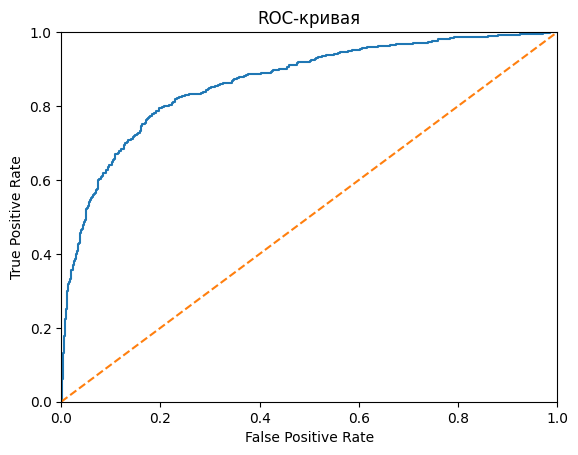

In [429]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)

plt.figure()
plt.plot(fpr, tpr)

plt.plot([0, 1], [0, 1], linestyle='--')

plt.xlim(0, 1)
plt.ylim(0, 1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

Проведем ещё один тест на адекватность модели и сравним метрику F1 нашей настроенней модели с метрикой F1 константной модели, которая всегда предсказывает 1.

In [430]:
dummy_model = DummyClassifier(strategy='constant', constant=1)
dummy_model.fit(features_train, target_train)
f1_score(dummy_model.predict(features_test), target_test)

0.3429991714995857

Метрика F1 константой модели 0.343, что почти в 2 раза меньше, чем метрика F1 нашей модели, что доказывает её адекватность и объективность.

## Общий вывод

***Первом этапом*** в данном проекте мы подготовили данные:
* провели предобработку данных (выявили и заполнили пропуски в столбце **Tenure**)
* произвели преобразование прямым кодированием над категориальными столбцами **Geography** и **Gender**
* удалили столбцы **RowNumber**, **CustomerId** и **Surname**, так как они могли создать лишний шум в данных
* провели деление данных на три выборки - обучающую, валидационную и тестовую - в соотношении 60/20/20 перед масштабированием признаков
* промасштабировали столбцы **CreditScore**, **Balance** и **EstimatedSalary** с помощью стандартизации

***Вторым этапом*** было выявление наличия дисбаланса классов в данных и изучение моделей без учёта дисбаланса:
* выявили дисбаланс отрицательного и положительного класса в соотношении 80/20 соответственно
* получили следующие показания ***F1-метрики*** у модели:
  * *дерева решений - 0.568*
  * *случайного леса - 0.581*
  * *логистической регрессии - 0.278*

По результатам видим, что хуже всего и с огромным отрывом справилась модель логистической регрессии. Модель случайного леса показала наилучшие результаты.

* построили матрицы ошибок для всех трёх моделей и выявили, что показатели чуть лучше у модели дерева решений: самый низкий показатель ложнонегативных предсказаний (11.15%), чем у моделей случайного леса (11.20%) и логистической регрессии (20.75%), и также самый высокий показатель истинноположительных предсказаний (9.85%), чем у моделей случайного леса (9.80%) и логистической регрессии (0.25%)

В ***третьем этапе*** опробовали 3 метода борьбы с влиянием дисбаланса классов и благодаря сранительной таблице метрик F1 выявили, что лучше всего себя показал ***метод взвешивания классов*** для ***модели случайного леса*** с оптимальными для неё гиперпараметрами - глубина деревьев 11 и численность деревьев 40.

Также обратили внимание, что метрика AUC_ROC менее критична к резульатам предсказаний модели, так как её значение всегда было на порядок выше, чем значение метрики F1.

В ***четвёртом этапе*** проекта провели тестирование лучшей модели, добивших следующих результатов:

* F1-метрика - 0.631
* метрика ROC-AUC - 0.866

По значениям метрик видим, что нам удалось корректно обучить и настроить модель: значение *метрики F1* больше задаваемого для нас порога (0.59), что значит то, что с задачей мы справились успешно. Также значение *метрики AUC_ROC* достаточно высокое.

Далее построили *ROC-кривую* и наглядно убедились в высоком качестве и адекватности модели.

Также сравнили результаты метрики F1 нашей модели случайного леса (0.631) с метрикой константной модели (0.343), разница которых дополнительно доказала объективность доработанной модели.